In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analysis_support import *
from plots import *

# IMPORTANT: need to install package `cm-super-minimal` and `dvipng` for matplotlib Latex Output to work

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 20,
    "axes.prop_cycle": plt.cycler('color', ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
instance_set = 'all'
instances = None
#instance_set = 'handcrafted'
#instances = [119, 160, 188, 192, 196, 250, 261, 263, 278, 287]

In [3]:
seeds = [1, 41, 83, 139, 181, 257, 307, 353, 401, 449]

In [4]:
file_pattern = f'classic.speed.BARN-{instance_set}/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
classic_table = tabulate_deterministic_results(results)

classic.speed.BARN-all/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json
Found 22048 result files
Error decoding JSON file: classic.speed.BARN-all\halton.classic.polytrace.bk\lazy_prm_classic.BARN.instance_063.halton.a_star.single_edge.bk.seed.307.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 16118 column 14 (char 367954)
Error decoding JSON file: classic.speed.BARN-all\uniform.classic.polytrace.bk\lazy_prm_classic.BARN.instance_062.uniform.a_star.single_edge.bk.seed.1.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 4882 column 26 (char 98168)
Missing results: 0


In [5]:
file_pattern = f'bc.speed.BARN-{instance_set}/*.*.*.*/lazy_prm_bc.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
bnc_table = tabulate_deterministic_results(results)

bc.speed.BARN-all/*.*.*.*/lazy_prm_bc.BARN.instance_*.json
Found 34849 result files
Missing results: 0


In [6]:
classic_configs, classic_tables = tabulate_results_by(classic_table, ('check_type','step_size','direction', 'max_speed'))

[array(['polytrace', 'unknown'], dtype=object), array([0.02, 0.1 ]), array(['bk'], dtype=object), array([1.5, 2. ])]
Tables generated: 8


In [7]:
bnc_configs, bnc_tables = tabulate_results_by(bnc_table, ('solver','no_good_type','direction', 'max_speed'))

[array(['cp_sat', 'pulse'], dtype=object), array(['multi_edge'], dtype=object), array(['bk', 'gammell'], dtype=object), array([1.5, 2. ])]
Tables generated: 8


In [8]:
classic_coverage = {}
for v in classic_configs:
    if len(classic_tables[v]) > 0:
        classic_coverage[v] = coverage_over_time(select_valid_instances(classic_tables[v]))

In [9]:
relevant_bnc_tables = {v: bnc_tables[v] for v in bnc_configs if v[1] == 'multi_edge'}

In [10]:
bnc_coverage = {}
for key, table in relevant_bnc_tables.items():
    bnc_coverage[key] = coverage_over_time(select_valid_instances(table))

# Coverage comparison, $v_{max} \leq 1.5$

('cp_sat', 'multi_edge', 'bk', 1.5)
('pulse', 'multi_edge', 'bk', 1.5)


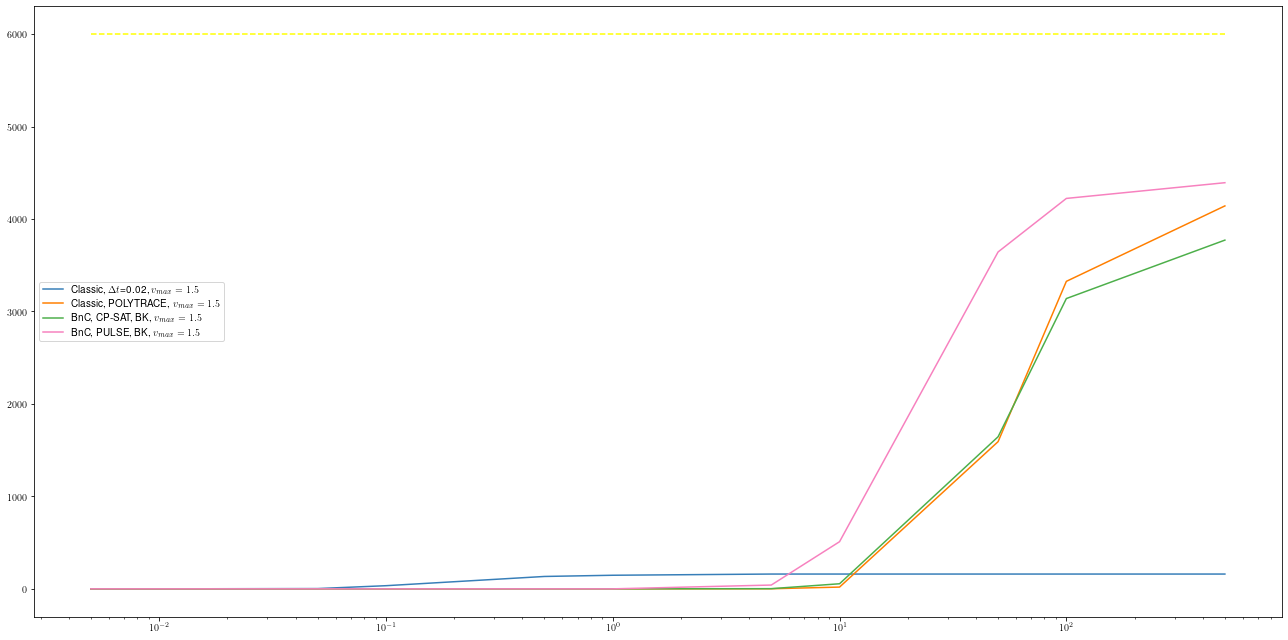

In [32]:
cmp_classic_configs = [('unknown', 0.02, 'bk', 1.5), ('polytrace', 0.1, 'bk', 1.5)]
bnc_configs = [('cp_sat', 'multi_edge', 'bk', 1.5), ('pulse', 'multi_edge', 'bk', 1.5)]

plt.figure(figsize=(18, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')

for v in cmp_classic_configs:
    label = 'Classic'
    if v[0] == 'polytrace':
        label += ', POLYTRACE'
    else:
        label += ', $\Delta t$={}'.format(v[1])
    label += ', ${} = {}$'.format('v_{max}', v[-1])
    plt.plot(default_time_breakpoints, classic_coverage[v], label=label)

for bnc_config in bnc_configs:
    print(bnc_config)
    label = 'BnC'
    if bnc_config[0] == 'cp_sat':
        label += ', CP-SAT'
    elif bnc_config[0] == 'pulse':
        label += ', PULSE'
    if bnc_config[2] == 'bk':
        label += ', BK'
    elif bnc_config[2] == 'gammell':
        label += ', Gammell'
    label += ', ${} = {}$'.format('v_{max}', bnc_config[-1])
    plt.plot(default_time_breakpoints, bnc_coverage[bnc_config], label=label)

#plt.title('Coverage of Lazy PRM configurations')
#plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
#plt.ylabel('Valid')
plt.legend()
plt.tight_layout()
plt.show()

## Detailed comparison, $v_{max} \leq 1.5$

In [12]:
classic_best = classic_tables[('polytrace', 0.1, 'bk', 1.5)]
bnc_best = bnc_tables[('pulse', 'multi_edge', 'bk', 1.5)]
cmp_table = pd.merge(classic_best, bnc_best, on=('instance', 'seed', 'sequence'), suffixes=('.classic', '.bnc'))
cmp_table.head()

,domain.classic,instance,seed,sequence,max_speed.classic,no_good_type.classic,solver.classic,direction.classic,check_type.classic,num_no_goods.classic,rgg_V.classic,rgg_E.classic,rgg_expansions.classic,rgg_dispersion.classic,elapsed_time.classic,plan_time.classic,verif_time.classic,iterations.classic,valid.classic,exact_verification_time.classic,step_size.classic,holonomic_cost_0.classic,holonomic_cost_k.classic,smooth_cost_0.classic,smooth_cost_k.classic,plan_length.classic,domain.bnc,max_speed.bnc,no_good_type.bnc,solver.bnc,direction.bnc,check_type.bnc,num_no_goods.bnc,rgg_V.bnc,rgg_E.bnc,rgg_expansions.bnc,rgg_dispersion.bnc,elapsed_time.bnc,plan_time.bnc,verif_time.bnc,iterations.bnc,valid.bnc,exact_verification_time.bnc,step_size.bnc,holonomic_cost_0.bnc,holonomic_cost_k.bnc,smooth_cost_0.bnc,smooth_cost_k.bnc,plan_length.bnc
0,BARN,instance_000,181,halton,1.5,single_edge,a_star,bk,polytrace,133,112,2494,10,5.150895,44.173013,0.081856,43.382811,143,True,0.0,0.1,12.632662,10.906848,12.759945,10.949519,12,BARN,1.5,multi_edge,pulse,bk,polytrace,58,602,120015,59,3.935869,72.053842,12.246818,46.340536,59,True,None,None,12.632662,9.715230,12.759945,9.626635,12
1,BARN,instance_000,257,halton,1.5,single_edge,a_star,bk,polytrace,133,112,2494,10,5.150895,57.849612,0.108563,56.895647,143,True,0.0,0.1,12.632662,10.906848,12.759945,10.949519,12,BARN,1.5,multi_edge,pulse,bk,polytrace,22,242,22546,23,2.988403,17.023739,0.282904,15.200285,23,True,None,None,12.632662,9.657529,12.759945,9.564727,10
2,BARN,instance_000,353,halton,1.5,single_edge,a_star,bk,polytrace,133,112,2494,10,5.150895,42.826930,0.082710,42.066003,143,True,0.0,0.1,12.632662,10.906848,12.759945,10.949519,12,BARN,1.5,multi_edge,pulse,bk,polytrace,31,332,30151,32,1.985022,25.373194,1.478907,21.159613,32,True,None,None,12.632662,9.724092,12.759945,9.662346,12
3,BARN,instance_000,401,halton,1.5,single_edge,a_star,bk,polytrace,133,112,2494,10,5.150895,47.437119,0.083295,46.672194,143,True,0.0,0.1,12.632662,10.906848,12.759945,10.949519,12,BARN,1.5,multi_edge,pulse,bk,polytrace,29,312,25458,30,5.079595,19.634877,0.681650,16.975029,30,True,None,None,12.632662,9.675865,12.759945,9.581623,12
4,BARN,instance_000,41,halton,1.5,single_edge,a_star,bk,polytrace,133,112,2494,10,5.150895,56.812027,0.123828,55.690623,143,True,0.0,0.1,12.632662,10.906848,12.759945,10.949519,12,BARN,1.5,multi_edge,pulse,bk,polytrace,27,292,21677,28,4.368252,20.538156,0.725116,17.799804,28,True,None,None,12.632662,9.662825,12.759945,9.574423,10


### Plan costs

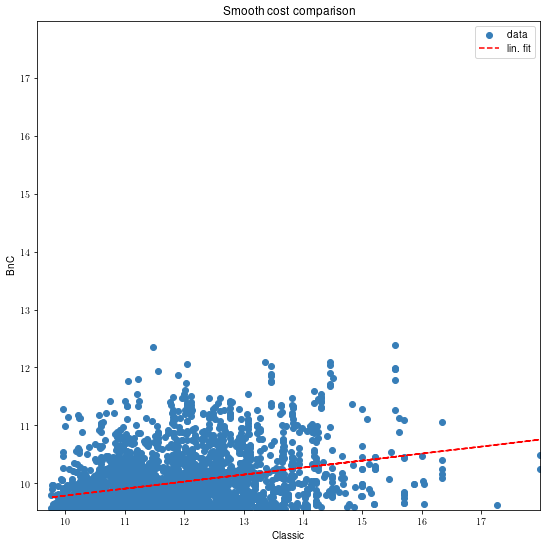

LinregressResult(slope=0.12115166796412102, intercept=8.573482884238258, rvalue=0.3020160811104791, pvalue=2.2560550493494654e-65, stderr=0.006925505844081074, intercept_stderr=0.0824849905082115)


In [13]:
x = cmp_table['smooth_cost_k.classic'].values
y = cmp_table['smooth_cost_k.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')
print(lin_model)

In [14]:
print(lin_model)

LinregressResult(slope=0.12115166796412102, intercept=8.573482884238258, rvalue=0.3020160811104791, pvalue=2.2560550493494654e-65, stderr=0.006925505844081074, intercept_stderr=0.0824849905082115)


## Plan Length

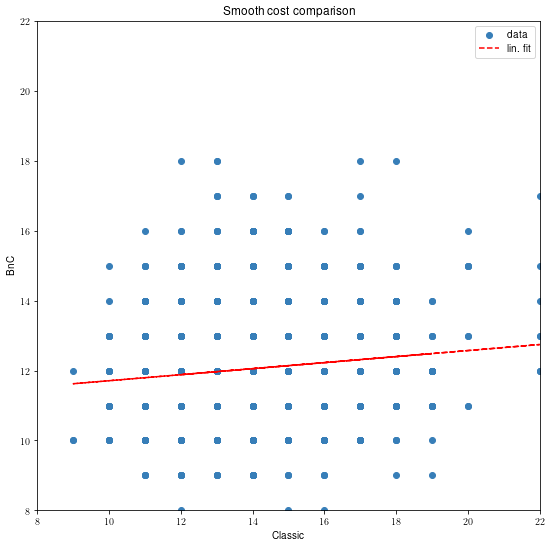

In [15]:
x = cmp_table['plan_length.classic'].values
y = cmp_table['plan_length.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')

In [16]:
print(lin_model)

LinregressResult(slope=0.08625432789325657, intercept=10.847566176384099, rvalue=0.10584754953996553, pvalue=4.6104752768820585e-09, stderr=0.014674887837978082, intercept_stderr=0.2051417439288509)


### Graph size

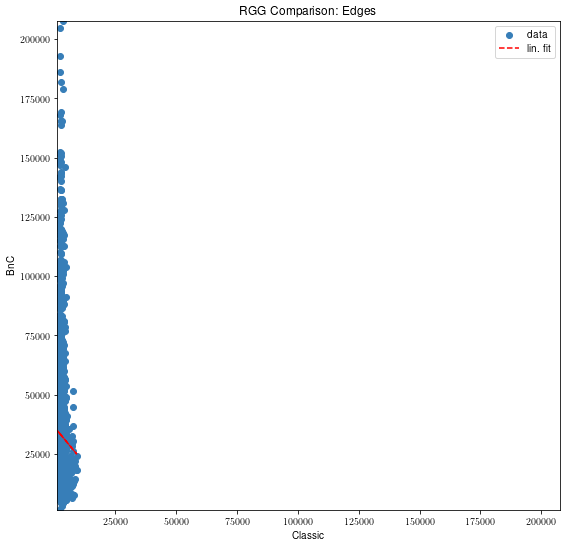

In [17]:
x = cmp_table['rgg_E.classic'].values
y = cmp_table['rgg_E.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Edges', x_name='Classic', y_name='BnC')

In [18]:
print(lin_model)

LinregressResult(slope=-1.2415269801792153, intercept=36201.31925252019, rvalue=-0.03856019794661761, pvalue=0.03318607272934632, stderr=0.5826598341724888, intercept_stderr=1644.1283883907493)


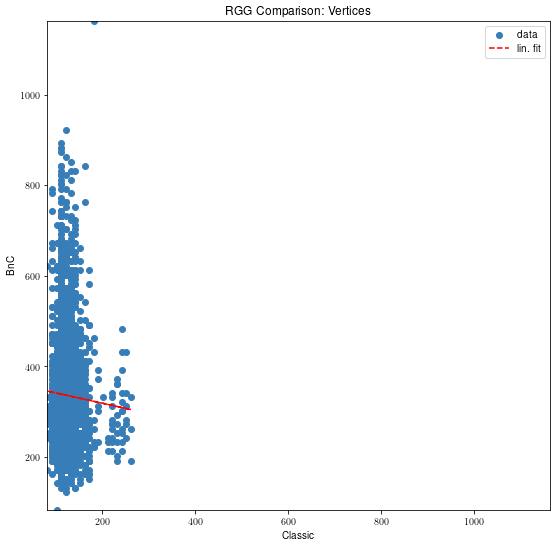

In [19]:
x = cmp_table['rgg_V.classic'].values
y = cmp_table['rgg_V.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Vertices', x_name='Classic', y_name='BnC')

In [20]:
print(lin_model)

LinregressResult(slope=-0.22645878663644206, intercept=363.9085584890665, rvalue=-0.03803338702163277, pvalue=0.03566678891431805, stderr=0.10775343455556972, intercept_stderr=13.3950445058073)


### Runtime

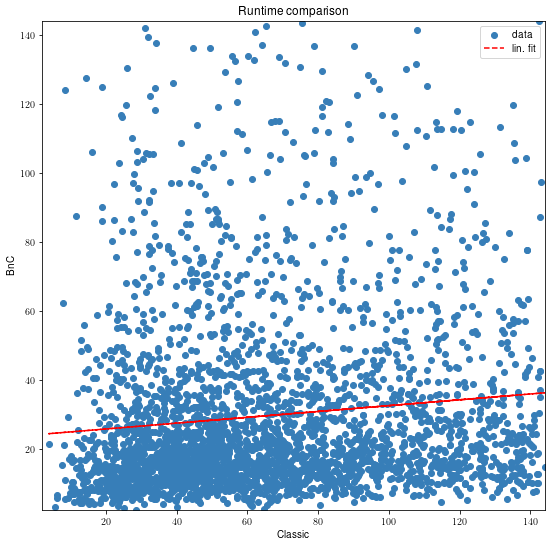

In [21]:
x = cmp_table['elapsed_time.classic'].values
y = cmp_table['elapsed_time.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Runtime comparison', x_name='Classic', y_name='BnC')

In [22]:
print(lin_model)

LinregressResult(slope=0.08465521159929289, intercept=23.981683531980437, rvalue=0.11198250927578625, pvalue=5.559714236621033e-10, stderr=0.013604560947424498, intercept_stderr=1.0055373502969398)


# Coverage Comparison, $v_{max} \leq 2$

('cp_sat', 'multi_edge', 'bk', 2.0)
('pulse', 'multi_edge', 'bk', 2.0)


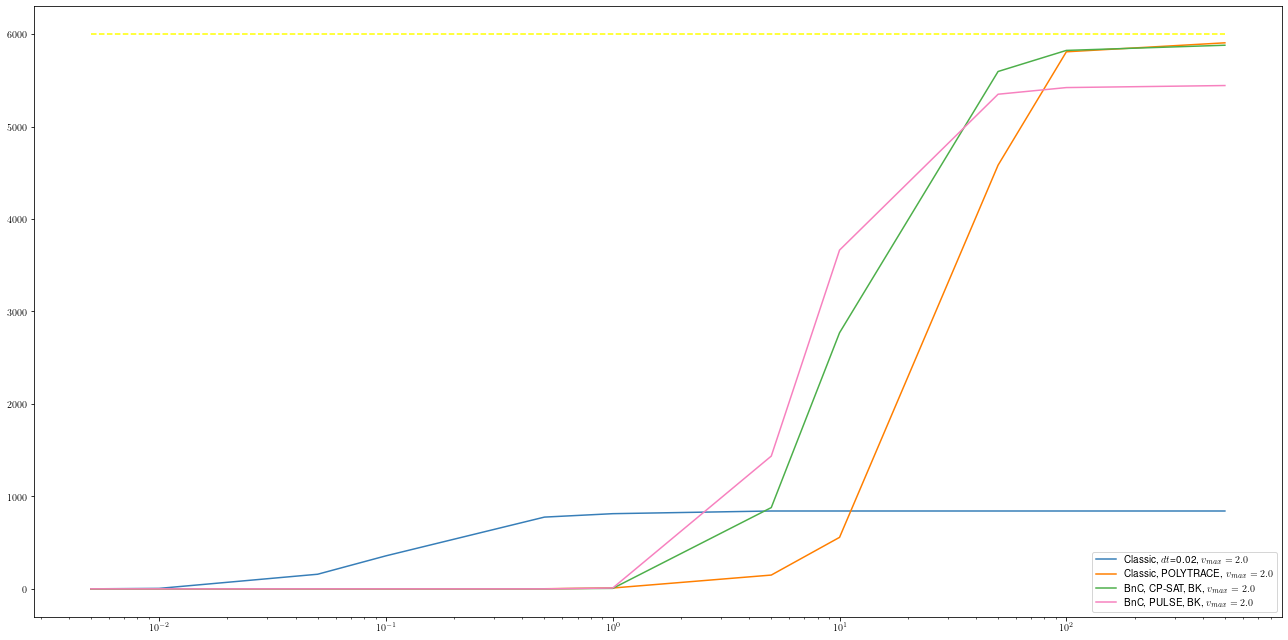

In [23]:
cmp_classic_configs = [('unknown', 0.02, 'bk', 2.0), ('polytrace', 0.1, 'bk', 2.0)]
bnc_configs = [('cp_sat', 'multi_edge', 'bk', 2.0), ('pulse', 'multi_edge', 'bk', 2.0)]

plt.figure(figsize=(18, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')

for v in cmp_classic_configs:
    label = 'Classic'
    if v[0] == 'polytrace':
        label += ', POLYTRACE'
    else:
        label += ', $dt$={}'.format(v[1])
    label += ', ${} = {}$'.format('v_{max}', v[-1])
    plt.plot(default_time_breakpoints, classic_coverage[v], label=label)

for bnc_config in bnc_configs:
    print(bnc_config)
    label = 'BnC'
    if bnc_config[0] == 'cp_sat':
        label += ', CP-SAT'
    elif bnc_config[0] == 'pulse':
        label += ', PULSE'
    if bnc_config[2] == 'bk':
        label += ', BK'
    elif bnc_config[2] == 'gammell':
        label += ', Gammell'
    label += ', ${} = {}$'.format('v_{max}', bnc_config[-1])
    plt.plot(default_time_breakpoints, bnc_coverage[bnc_config], label=label)

#plt.title('Coverage of Lazy PRM configurations')
#plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
#plt.ylabel('Valid')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
## Detailed comparison, $v_{max} \leq 1.5$

In [25]:
classic_best = classic_tables[('polytrace', 0.1, 'bk', 2.0)]
bnc_best = bnc_tables[('pulse', 'multi_edge', 'bk', 2.0)]
cmp_table = pd.merge(classic_best, bnc_best, on=('instance', 'seed', 'sequence'), suffixes=('.classic', '.bnc'))
cmp_table.head()

,domain.classic,instance,seed,sequence,max_speed.classic,no_good_type.classic,solver.classic,direction.classic,check_type.classic,num_no_goods.classic,rgg_V.classic,rgg_E.classic,rgg_expansions.classic,rgg_dispersion.classic,elapsed_time.classic,plan_time.classic,verif_time.classic,iterations.classic,valid.classic,exact_verification_time.classic,step_size.classic,holonomic_cost_0.classic,holonomic_cost_k.classic,smooth_cost_0.classic,smooth_cost_k.classic,plan_length.classic,domain.bnc,max_speed.bnc,no_good_type.bnc,solver.bnc,direction.bnc,check_type.bnc,num_no_goods.bnc,rgg_V.bnc,rgg_E.bnc,rgg_expansions.bnc,rgg_dispersion.bnc,elapsed_time.bnc,plan_time.bnc,verif_time.bnc,iterations.bnc,valid.bnc,exact_verification_time.bnc,step_size.bnc,holonomic_cost_0.bnc,holonomic_cost_k.bnc,smooth_cost_0.bnc,smooth_cost_k.bnc,plan_length.bnc
0,BARN,instance_000,1,halton,2.0,single_edge,a_star,bk,polytrace,79,62,968,5,6.310456,42.703065,0.055779,42.392014,84,True,0.0,0.1,12.632662,11.0076,12.759945,11.1497,11,BARN,2.0,multi_edge,pulse,bk,polytrace,13,152,7969,14,4.406858,17.204915,0.210943,16.168098,14,True,None,None,12.632662,9.687573,12.759945,9.601290,8
1,BARN,instance_000,139,halton,2.0,single_edge,a_star,bk,polytrace,79,62,968,5,6.310456,40.862363,0.042035,40.591581,84,True,0.0,0.1,12.632662,11.0076,12.759945,11.1497,11,BARN,2.0,multi_edge,pulse,bk,polytrace,6,82,2510,7,3.189081,6.239138,0.021127,6.036809,7,True,None,None,12.632662,9.806864,12.759945,9.847460,8
2,BARN,instance_000,181,halton,2.0,single_edge,a_star,bk,polytrace,79,62,968,5,6.310456,40.270780,0.064194,39.986179,84,True,0.0,0.1,12.632662,11.0076,12.759945,11.1497,11,BARN,2.0,multi_edge,pulse,bk,polytrace,25,272,21268,26,4.563250,32.479462,1.256820,29.513075,26,True,None,None,12.632662,9.669229,12.759945,9.574447,10
3,BARN,instance_000,257,halton,2.0,single_edge,a_star,bk,polytrace,79,62,968,5,6.310456,38.085121,0.040935,37.835626,84,True,0.0,0.1,12.632662,11.0076,12.759945,11.1497,11,BARN,2.0,multi_edge,pulse,bk,polytrace,10,122,6282,11,3.736747,8.358848,0.031202,7.963075,11,True,None,None,12.632662,9.651331,12.759945,9.570385,8
4,BARN,instance_000,307,halton,2.0,single_edge,a_star,bk,polytrace,79,62,968,5,6.310456,40.888406,0.044861,40.596130,84,True,0.0,0.1,12.632662,11.0076,12.759945,11.1497,11,BARN,2.0,multi_edge,pulse,bk,polytrace,21,232,19423,22,3.474833,22.208298,1.053113,19.516838,22,True,None,None,12.632662,9.672111,12.759945,9.588783,10


## Plan costs

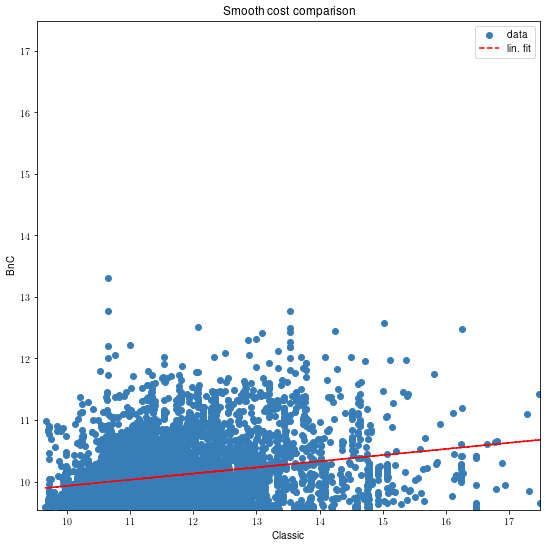

LinregressResult(slope=0.09992627373085046, intercept=8.93247993991436, rvalue=0.23124664331605727, pvalue=6.510207718597873e-66, stderr=0.005747153835984588, intercept_stderr=0.06791757046145507)


In [26]:
x = cmp_table['smooth_cost_k.classic'].values
y = cmp_table['smooth_cost_k.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')
print(lin_model)

## Plan Length

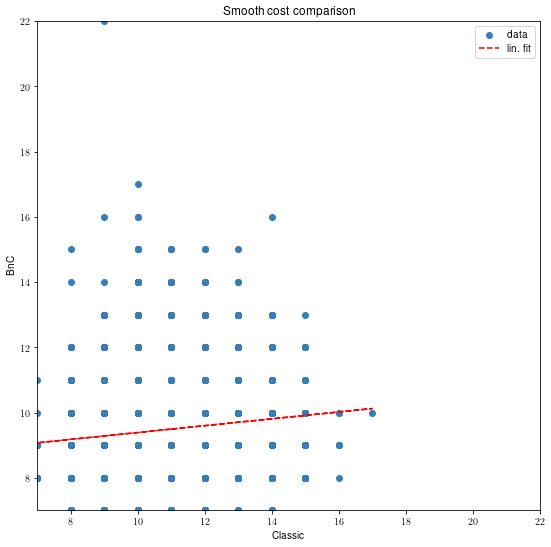

In [27]:
x = cmp_table['plan_length.classic'].values
y = cmp_table['plan_length.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')

## Graph Size

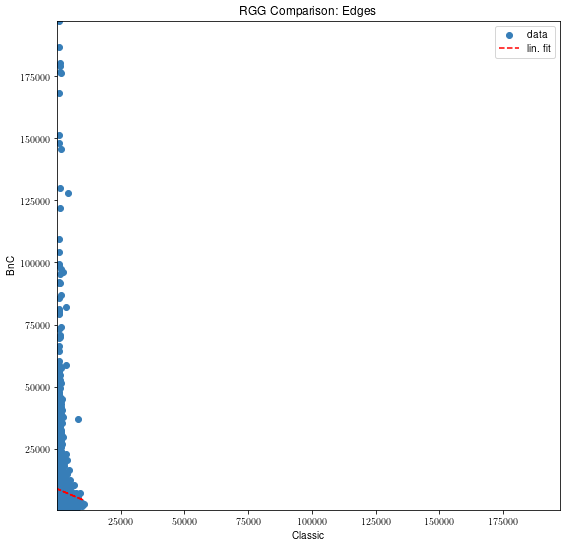

LinregressResult(slope=-0.43957685133349655, intercept=8882.724571705563, rvalue=-0.02863955965693319, pvalue=0.03614159158073715, stderr=0.20973592201161007, intercept_stderr=289.3169171974581)


In [28]:
x = cmp_table['rgg_E.classic'].values
y = cmp_table['rgg_E.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Edges', x_name='Classic', y_name='BnC')
print(lin_model)

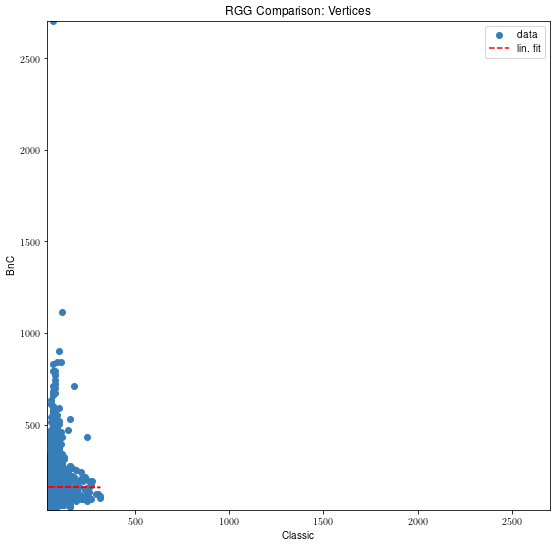

LinregressResult(slope=-0.014081207109637202, intercept=161.3548662621465, rvalue=-0.00418691218422536, pvalue=0.75940526277454, stderr=0.045975319069197496, intercept_stderr=3.4063947765815374)


In [29]:
x = cmp_table['rgg_V.classic'].values
y = cmp_table['rgg_V.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Vertices', x_name='Classic', y_name='BnC')
print(lin_model)

## Runtime

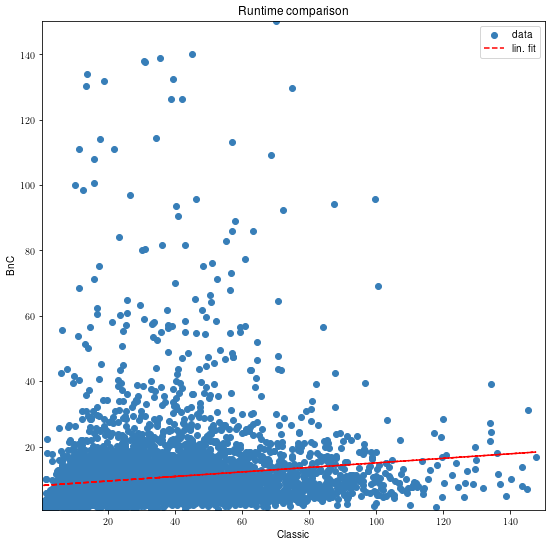

In [30]:
x = cmp_table['elapsed_time.classic'].values
y = cmp_table['elapsed_time.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Runtime comparison', x_name='Classic', y_name='BnC')